In [1]:
import os
import sqlalchemy as sa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly as pl
import plotly.express as px
import geopandas as gp
import mysql.connector

Opdracht 1 Database

#Creating tables in database using mysql CLI

MariaDB [climate_watch]> CREATE TABLE Global_Temperatures(
    ->     dt DATE,
    ->     LandAverageTemperature FLOAT,
    ->     LandAverageTemperatureUncertainty FLOAT,
    ->     LandMaxTemperature FLOAT,
    ->     LandMaxTemperatureUncertainty FLOAT,
    ->     LandMinTemperature FLOAT,
    ->     LandMinTemperatureUncertainty FLOAT,
    ->     LandAndOceanAverageTemperature FLOAT,
    ->     LandAndOceanAverageTemperatureUncertainty FLOAT);

MariaDB [climate_watch]> CREATE TABLE GlobalLandTemperaturesByState(
    -> dt DATE,
    -> AverageTemperature FLOAT,
    -> AverageTemperatureUncertainty FLOAT,
    -> State VARCHAR(255),
    -> Country VARCHAR(255));

MariaDB [climate_watch]> CREATE TABLE GlobalLandTemperaturesByMajorCity (
    -> dt DATE,
    -> AverageTemperature FLOAT,
    -> AverageTemperatureUncertainty FLOAT,
    -> City VARCHAR(255),
    -> Country VARCHAR(255),
    -> Latitude VARCHAR(10),
    -> Longitude VARCHAR(10));

MariaDB [climate_watch]> CREATE TABLE GlobalLandTemperaturesByCountry(
    -> dt DATE,
    -> AverageTemperature FLOAT,
    -> AverageTemperatureUncertainty FLOAT,
    -> Country VARCHAR(255));

MariaDB [climate_watch]> CREATE TABLE GlobalLandTemperaturesByCity(
    -> dt DATE,
    -> AverageTemperature FLOAT,
    -> AverageTemperatureUncertainty FLOAT,
    -> City VARCHAR(255),
    -> Country VARCHAR(255),
    -> Latitude VARCHAR(10),
    -> Longitude VARCHAR(10));

#Loading data in tables using mysql CLI

LOAD DATA LOCAL INFILE 'C:/users/alexy/downloads/climatedata/climatedata/GlobalTemperatures.csv'
INTO TABLE global_temperatures
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES;

LOAD DATA LOCAL INFILE 'C:/users/alexy/downloads/climatedata/climatedata/GlobalLandTemperaturesByState.csv'
INTO TABLE by_state
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES;

LOAD DATA LOCAL INFILE 'C:/users/alexy/downloads/climatedata/climatedata/GlobalLandTemperaturesByMajorCity.csv'
INTO TABLE by_major_city
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES;

LOAD DATA LOCAL INFILE 'C:/users/alexy/downloads/climatedata/climatedata/GlobalLandTemperaturesByCountry.csv'
INTO TABLE by_country
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES;

LOAD DATA LOCAL INFILE 'C:/users/alexy/downloads/climatedata/climatedata/GlobalLandTemperaturesByCity.csv'
INTO TABLE by_city
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 LINES;


In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="climate_watch"
)

def get_data(table_name):
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, conn)
    return df

city_data = get_data("by_city")
country_data = get_data("by_country")
major_city_data = get_data("by_major_city")
state_data = get_data("by_state")
global_data = get_data("global_temperatures")


C:\Users\alexy\AppData\Local\Temp\ipykernel_18488\3335858158.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


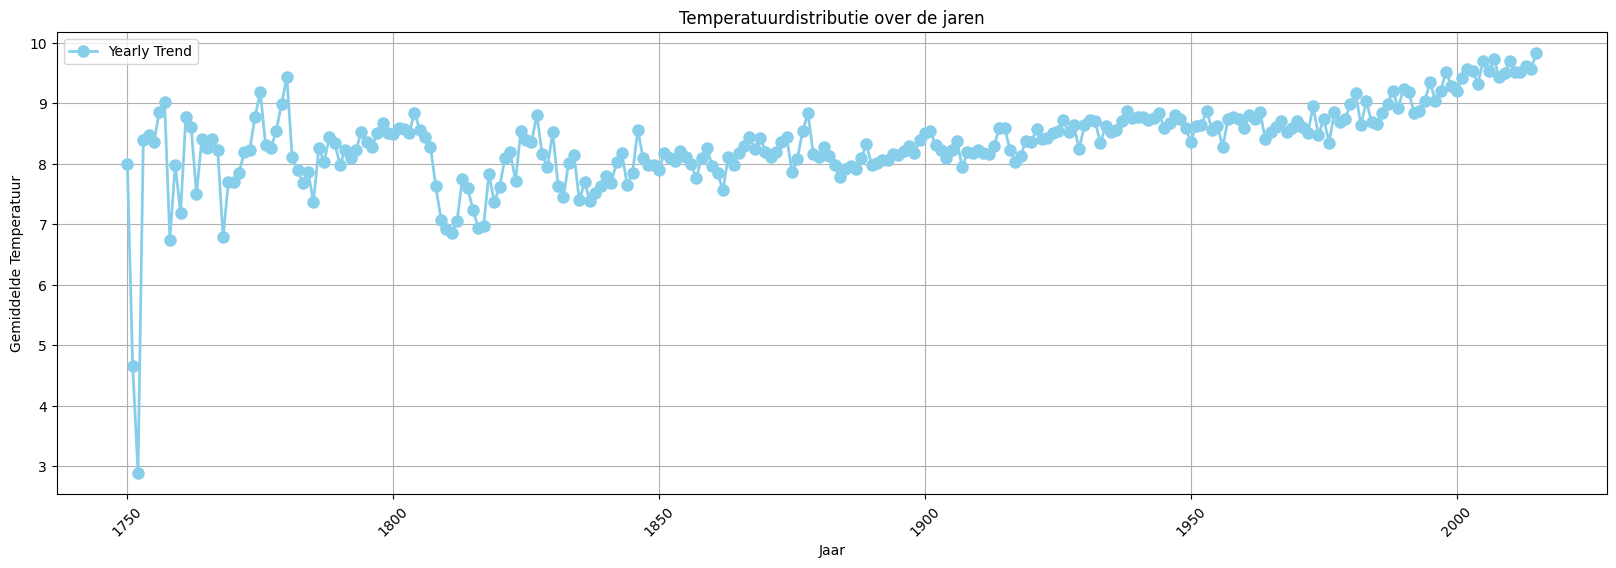

In [3]:
#Opdracht 1 Exploration
global_data['dt'] = pd.to_datetime(global_data['dt'])
global_data['year'] = pd.to_datetime(global_data['dt']).dt.year
grouped_global = global_data.groupby('year').mean()
x = grouped_global.index
y = grouped_global['LandAverageTemperature']


plt.figure(figsize=(20,6))
plt.plot(x,y, marker='o', markersize=8, color='skyblue', linewidth=2, label='Yearly Trend')
plt.xlabel('Jaar')
plt.ylabel('Gemiddelde Temperatuur')
plt.title('Temperatuurdistributie over de jaren')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

) missing from current font.\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


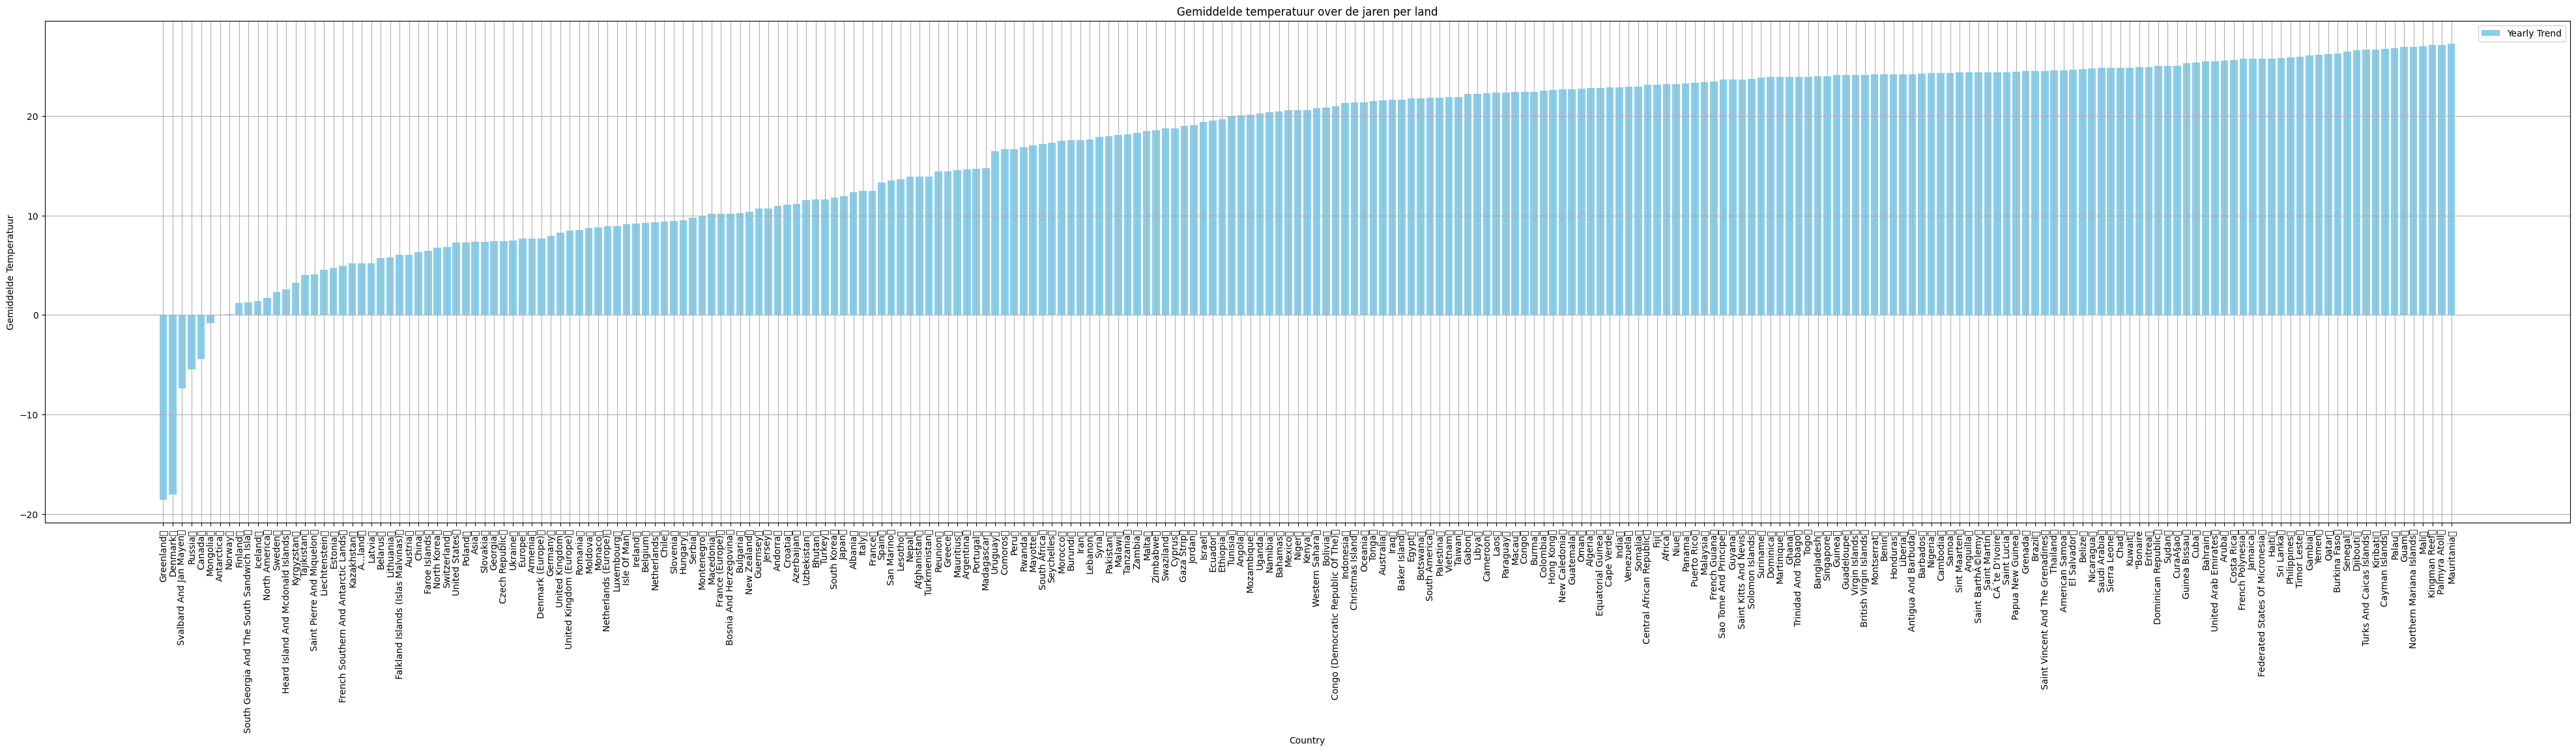

In [4]:
#Opdracht 2 Gerichte dataset
#Country Dataset
country_data['dt'] = pd.to_datetime(country_data['dt'])
country_data['year'] = pd.to_datetime(country_data['dt']).dt.year
grouped_country = country_data.groupby('Country')['AverageTemperature'].mean().sort_values()

plt.figure(figsize=(50,10))
plt.bar(grouped_country.index,grouped_country.values, color='skyblue', label='Yearly Trend')
plt.xlabel('Country')
plt.ylabel('Gemiddelde Temperatuur')
plt.title('Gemiddelde temperatuur over de jaren per land')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

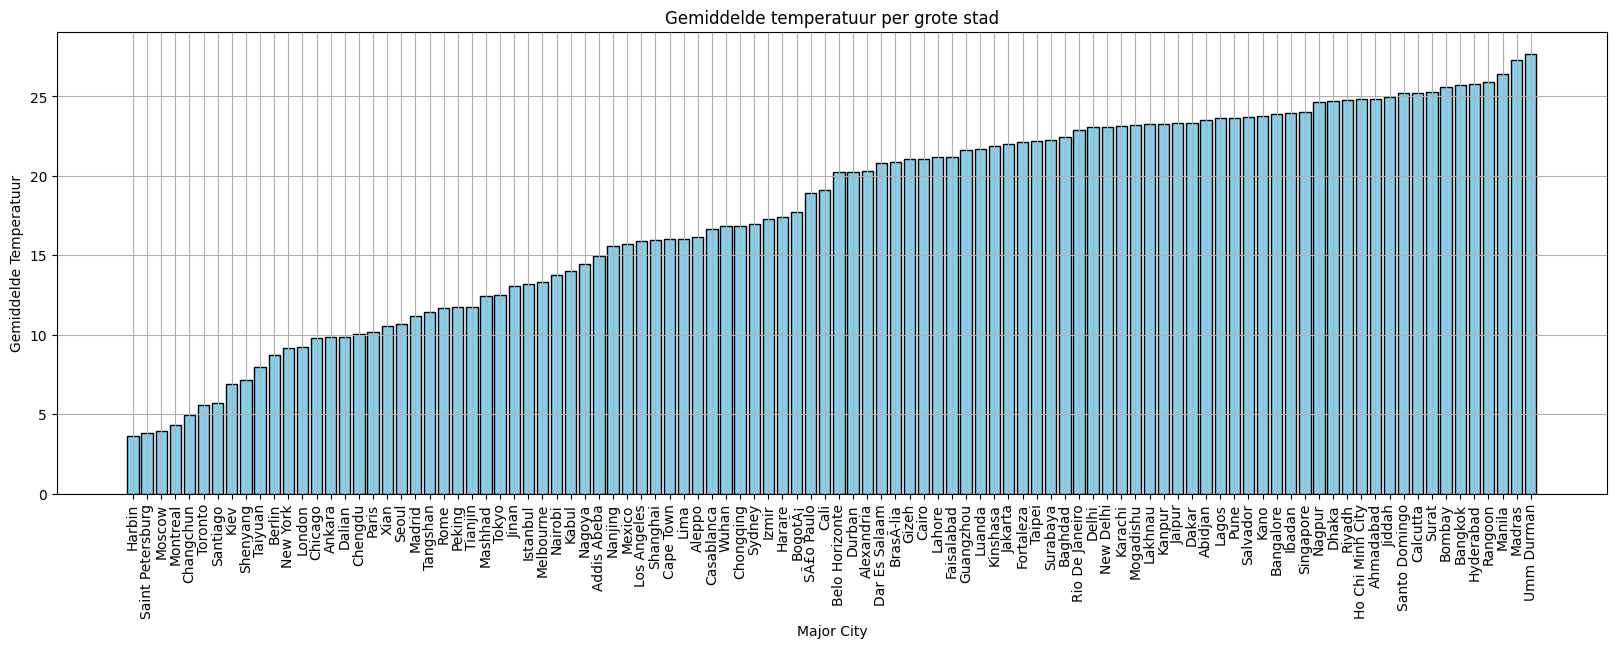

In [5]:
#Opdracht 2
#(Major) City Dataset

major_city_data['dt'] = pd.to_datetime(major_city_data['dt'])
major_city_data['year'] = pd.to_datetime(major_city_data['dt']).dt.year
grouped_major_city = major_city_data.groupby('City')['AverageTemperature'].mean().sort_values()

plt.figure(figsize=(20,6))
plt.bar(grouped_major_city.index,grouped_major_city.values, color='skyblue', edgecolor='black')
plt.xlabel('Major City')
plt.ylabel('Gemiddelde Temperatuur')
plt.title('Gemiddelde temperatuur per grote stad')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


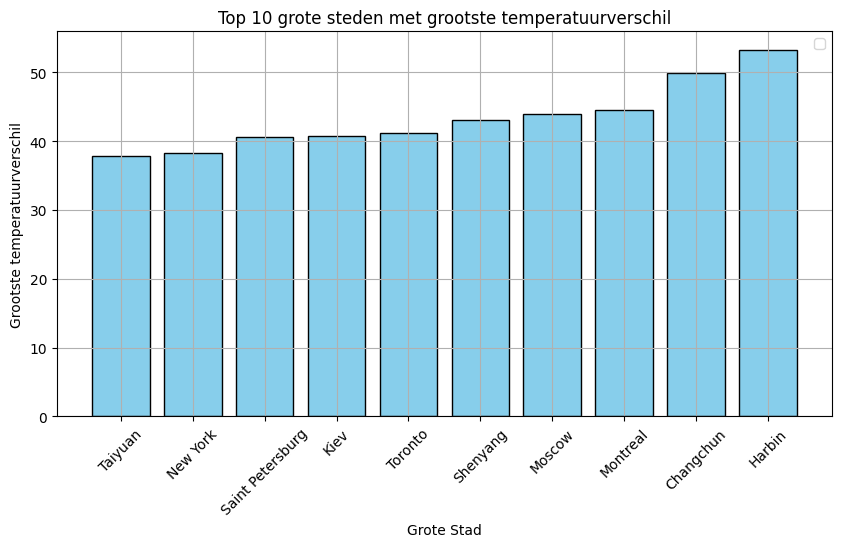

In [6]:
max_major_city = major_city_data.groupby('City')['AverageTemperature'].max()
min_major_city = major_city_data.replace({0: np.nan}).groupby('City')['AverageTemperature'].min()
difference = (max_major_city-min_major_city).nlargest(10).sort_values()

plt.figure(figsize=(10,5))
plt.bar(difference.index,difference.values, color='skyblue', edgecolor='black')
plt.xlabel('Grote Stad')
plt.ylabel('Grootste temperatuurverschil')
plt.title('Top 10 grote steden met grootste temperatuurverschil')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\alexy\AppData\Local\Temp\ipykernel_18488\3392519644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_major_city['dt'] = pd.to_datetime(filtered_major_city['dt'])
C:\Users\alexy\AppData\Local\Temp\ipykernel_18488\3392519644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_major_city['year'] = pd.to_datetime(filtered_major_city['dt']).dt.year


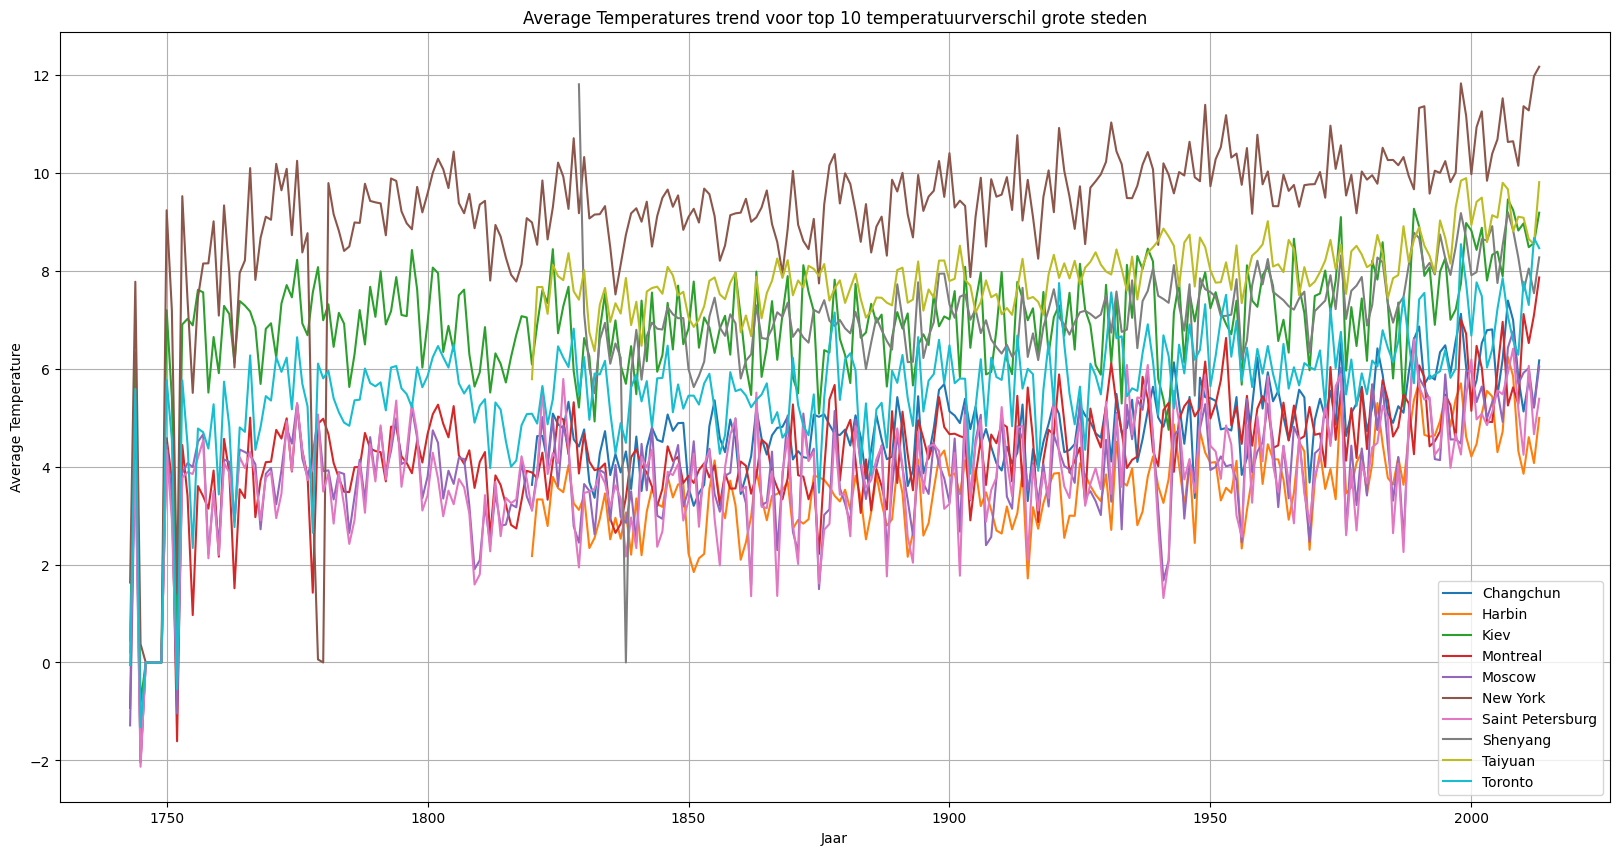

In [7]:
filtered_major_city = major_city_data[major_city_data['City'].isin(difference.index)]
filtered_major_city['dt'] = pd.to_datetime(filtered_major_city['dt'])
filtered_major_city['year'] = pd.to_datetime(filtered_major_city['dt']).dt.year
grouped_10_mcity=filtered_major_city.groupby(['year', 'City'])['AverageTemperature'].mean().reset_index()


plt.figure(figsize=(20,10))
for mcity, mcity_data in grouped_10_mcity.groupby('City'):
    plt.plot(mcity_data['year'], mcity_data['AverageTemperature'], label=mcity)
plt.title('Average Temperatures trend voor top 10 temperatuurverschil grote steden')
plt.xlabel('Jaar')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


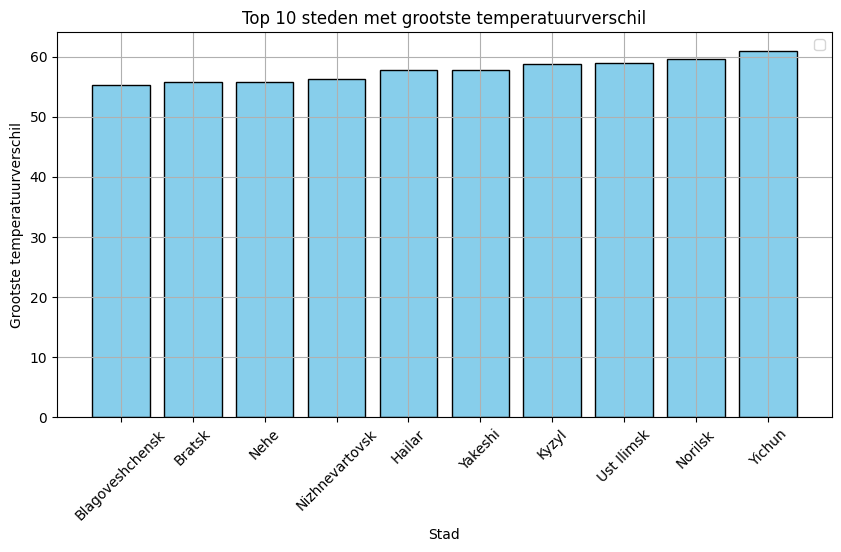

In [8]:
max_city = city_data.groupby('City')['AverageTemperature'].max()
min_city = city_data.replace({0: np.nan}).groupby('City')['AverageTemperature'].min()
city_difference = (max_city-min_city).nlargest(10).sort_values()

plt.figure(figsize=(10,5))
plt.bar(city_difference.index,city_difference.values, color='skyblue', edgecolor='black')
plt.xlabel('Stad')
plt.ylabel('Grootste temperatuurverschil')
plt.title('Top 10 steden met grootste temperatuurverschil')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\alexy\AppData\Local\Temp\ipykernel_18488\3973921211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_city['dt'] = pd.to_datetime(filtered_city['dt'])
C:\Users\alexy\AppData\Local\Temp\ipykernel_18488\3973921211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_city['year'] = pd.to_datetime(filtered_city['dt']).dt.year


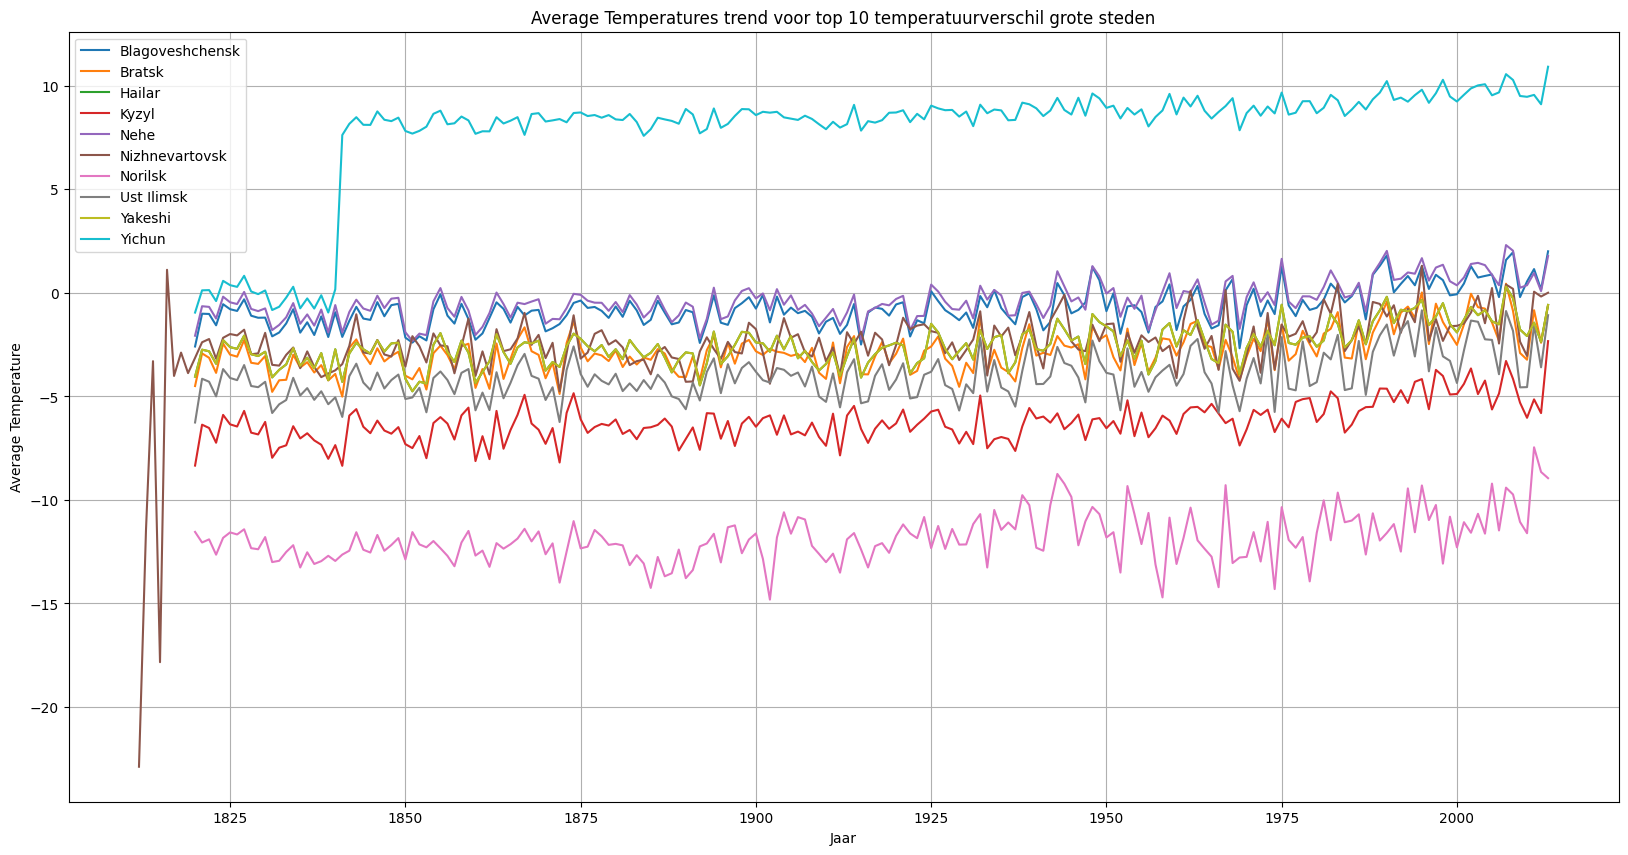

In [9]:
filtered_city = city_data[city_data['City'].isin(city_difference.index)]
filtered_city['dt'] = pd.to_datetime(filtered_city['dt'])
filtered_city['year'] = pd.to_datetime(filtered_city['dt']).dt.year
grouped_10_city=filtered_city.replace({0: np.nan}).groupby(['year', 'City'])['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(20,10))
for scity, scity_data in grouped_10_city.groupby('City'):
    plt.plot(scity_data['year'], scity_data['AverageTemperature'], label=scity)
plt.title('Average Temperatures trend voor top 10 temperatuurverschil grote steden')
plt.xlabel('Jaar')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


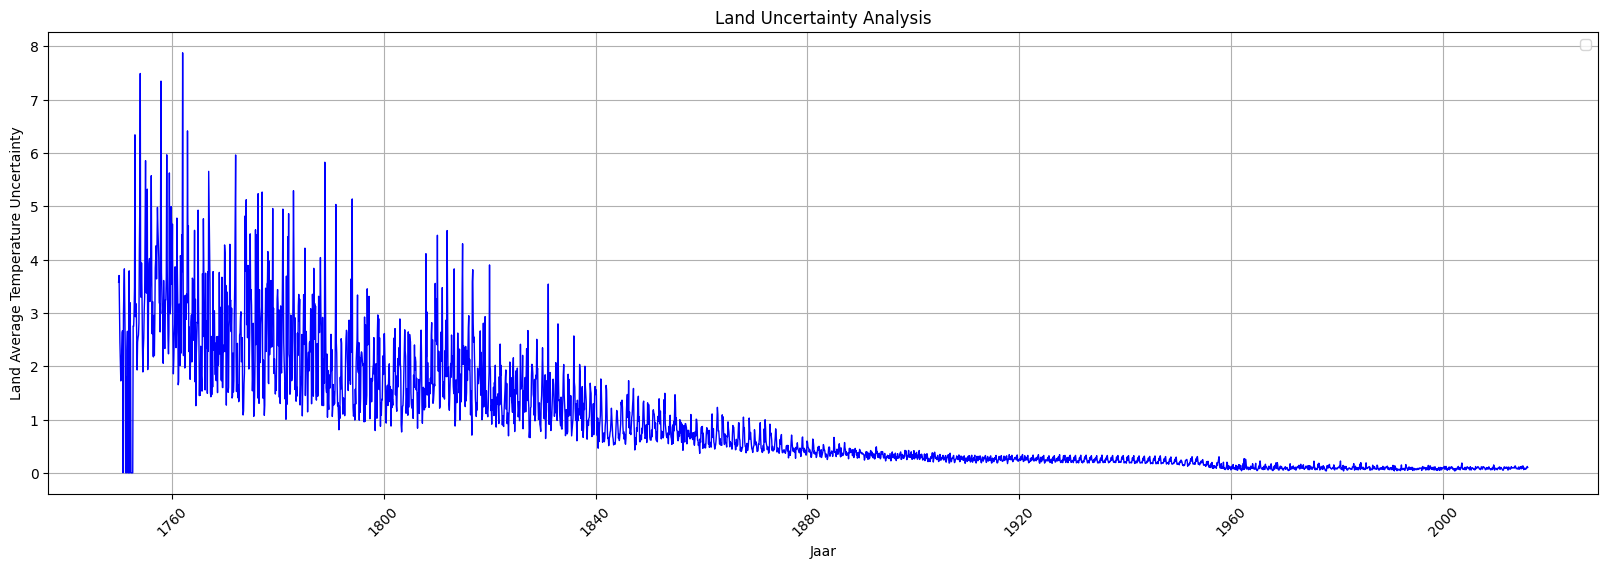

In [10]:
#Opdracht 3 Uncertainty Analysis
global_data['dt'] = pd.to_datetime(global_data['dt'])
x = global_data['dt']
y = global_data['LandAverageTemperatureUncertainty']


plt.figure(figsize=(20,6))
plt.plot(x,y, markersize=8, color='blue', linewidth=1)
plt.xlabel('Jaar')
plt.ylabel('Land Average Temperature Uncertainty')
plt.title('Land Uncertainty Analysis')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


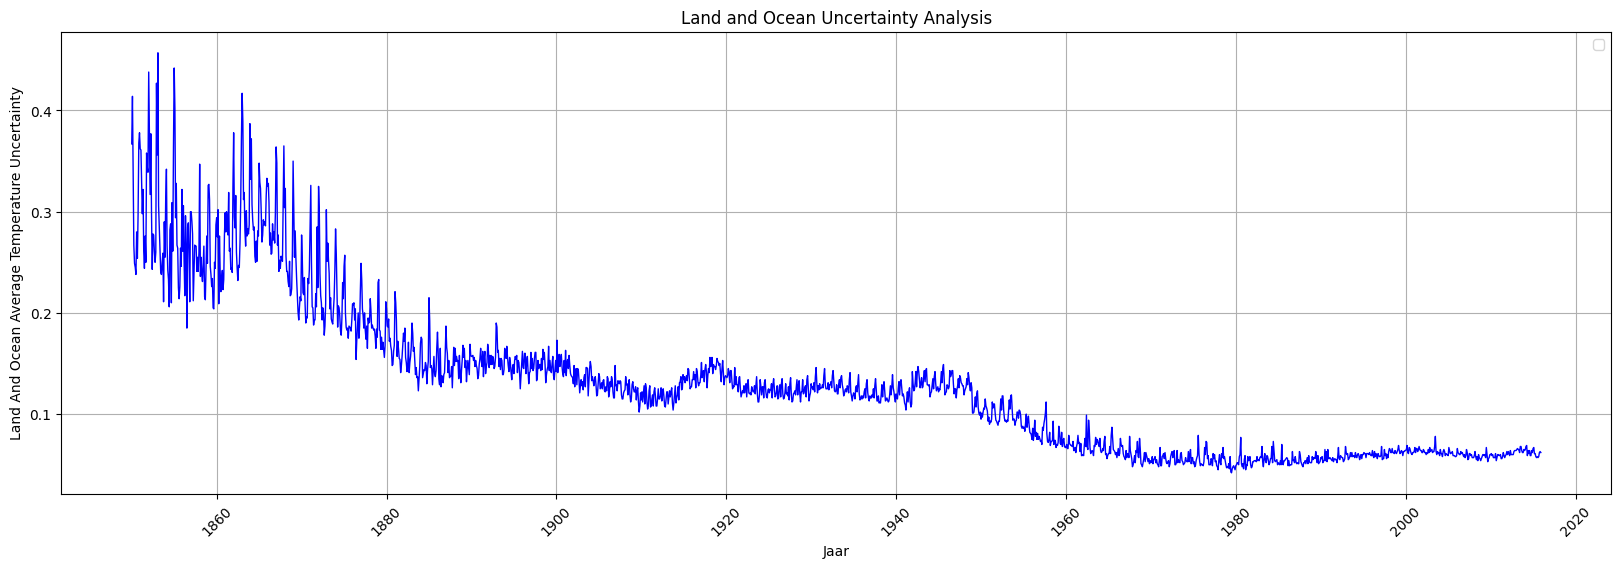

In [11]:
global_data['dt'] = pd.to_datetime(global_data['dt'])
cleaned_global = global_data.replace({0: np.nan})
x = cleaned_global['dt']
y = cleaned_global['LandAndOceanAverageTemperatureUncertainty']


plt.figure(figsize=(20,6))
plt.plot(x,y, markersize=8, color='blue', linewidth=1)
plt.xlabel('Jaar')
plt.ylabel('Land And Ocean Average Temperature Uncertainty')
plt.title('Land and Ocean Uncertainty Analysis')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Opdracht 4 Geospatial Analysis

geo_data = major_city_data.groupby('City').agg({'AverageTemperature' : 'mean', 'Latitude': 'first', 'Longitude':'first'}).reset_index()
print(geo_data)
fig = px.scatter_geo(geo_data, locations='City', locationmode='city names', lat='Latitude', lon='Longitude', hover_name='AverageTemperature')
fig.show()

           City  AverageTemperature Latitude  Longitude
0       Abidjan           23.516925    5.63N    3.23W\r
1   Addis Abeba           14.974350    8.84N   38.11E\r
2     Ahmadabad           24.854604   23.31N   72.52E\r
3        Aleppo           16.134015   36.17N   37.79E\r
4    Alexandria           20.289785   31.35N   30.16E\r
..          ...                 ...      ...        ...
95        Tokyo           12.524995   36.17N  139.23E\r
96      Toronto            5.599214   44.20N   80.50W\r
97   Umm Durman           27.687519   15.27N   32.50E\r
98        Wuhan           16.822825   29.74N  114.46E\r
99         Xian           10.535667   34.56N  108.97E\r

[100 rows x 4 columns]


ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of scattergeo
        Received value: 'city names'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']